# Aula de Machine Learning

In [1]:
import os
os.listdir('images')

['machine-learning.jpg', 'AI-segments.png']

## 1. Introdução

Machine learning (ML) é uma categoria de algorítimos que recebem dados como input e conseguem prever outputs baseados em análises estatísticas sem serem explicitamente programados.

### 1.1 Diferença entre IA, ML e DP

<img src="images/AI-segments.png"  style="width: 600px"/>


## 2. Tipos de ML
Machine Learning pode ser em grande parte classificado em 3 tipos de algorítimos:
1. **Aprendizado Supervisionado** - algoritimos desenhados para aprender utilizando exemplos. O nome "supervisionado" deriva da ideia desse tipo de modelo ter um professor supervisionando os resultados.
2. **Aprendizado não Supervisionado** - algoritimo aprende através da observação dos dados e procura padrões ou relações entre eles para a criação dos clusters.
3. **Aprendizado por Reforço** - é a habilidade de um agente de interagir com o ambiente e encontrar qual é a melhor saída. Ele segue o conceito de tentativa e erro na aprendizagem. O agente é recompensado ou penalizado dependendo se a resposta está certa ou errada. Uma vez treinados ele está pronto para prever em novos dados.
<br>
<img src="images/machine-learning.jpg"  style="width: 500px" />
<br>
Fonte: https://www.ceralytics.com/3-types-of-machine-learning/


[![Vídeo do Aprendizado por reforço jogando Mario]({image-url})](https://youtu.be/05rEefXlmhI} "Mario")

## 3. Principais modelagens para cada tipo de ML
<br>
<img src="images/ML12.png"  style="width: 700px" />

## 4. Modelos Não Supervisionados: Clusterização
### 1. Introdução <br>
Um dos problemas que podem ser resolvidos com Machine Learning é o da clusterização!
 <br>  <br>
Este tipo de problema consiste em agrupar itens semelhantes, isto é, criar grupos (ou clusters) dos dados que são parecidos entre si.
 <br> <br>
Problemas como estes podem aparecer em diversos contextos:
 <br>
* Identificação de tipos de clientes parecidos, para o direcionamento de marketing;
* Agrupamento de cidades próximas para melhor logística de entrega de produtos;
* Identificação de padrões climáticos;
* Identificação de genes relacionados à determinada doença,
...e muitas outros!
 <br> <br>
Por exemplo, só de olhar pros dados plotados a seguir, fica fácil de identificar 4 grupos distintos, não é mesmo?

<img src="images/ML1.png"/>

Mas, como o computador pode identificar estes grupos?
<br><br>
Para isso, podemos usar o k-means, um dos mais simples algoritmos de clusterização.
<br><br>
### 2. k-means
O k-means é utilizado para a determinação de um número k de clusters em nossos dados (mais a frente explicamos melhor como escolher o melhor valor de k)
<br><br>
O primeiro passo pra aplicar o k-means é:

* Determinar o número k de clusters! <br>

Se plotarmos nossos dados, como no gráfico acima, fica claro que devemos ter k = 4, não é mesmo?
<br><br>
Uma vez determinado o número k de clusters, podemos construir nosso modelo!
<br><br>

#### 2.1 E como o k-means funciona?
Uma vez escolhido o número de clusters, o k-means segue as seguintes etapas:

1) k pontos são escolhidos aleatoriamente como sendo os centróides dos clusters (centróide é o centro do cluster);

2) Para cada ponto, vamos calcular qual é a distância entre ele e os k centróides. Aquele centróide que estiver mais perto, será o cluster ao qual este ponto pertencerá. Fazemos isso para todos os pontos!
<img src="images/kmeans_example.png"  style="width: 400px" />

3) Ao fim do passo 2, teremos k clusters, cada um com seu centróide, e todos os pontos pertencerão a determinado cluster!

4) Uma vez que temos os clusters, calculamos qual é de fato o centro de cada um deles. Isso é feito tomando a média da posição de todos os pontos;

5) Após determinar os novos k centróides, repetimos o processo!

6) E o processo se repete até que os centróides não mudem mais. Quando esta convergência for alcançada (ou após o número determinado de iterações), o algoritmo termina!

<img src="images/k_means.904b38d_slow.gif"  style="width: 600px" />
<br>
Fonte: https://ml-explained.com/blog/kmeans-explained

<br>

#### 2.2 Como construir um modelo de k-means em Python?
Primeiramente, lemos nossos dados e os armazenamos na variável X. Para os dados acima, usamos um dataset do próprio sklearn:


In [25]:
# importar pandas, seaborn e matplotlib.pyplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# !pip install scikit-learn

In [2]:
#importamos o dataset
from sklearn.datasets import make_blobs

#armazenamos o dataset na variável X
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

Note que temos apenas as features dos dados (no caso, coordenadas x e y). Iso caracteriza um problema de clusterização não-supervisionado: quando nossos dados não têm targets, apenas features!

Depois, importamos a classe do modelo do sklearn:

In [35]:
from sklearn.cluster import KMeans

Fixamos o número k de clusters, após determiná-lo (veja a parte 2.2 pra outras formas de determinar o k!)

In [36]:
k = 4

Para instanciar o modelo, fazemos:

In [37]:
kmeans = KMeans(n_clusters = k, max_iter = 1000)

Temos vários argumentos na classe, mas os principais, que mostramos acima, são:

* n_clusters: quantos clusters queremos (o número k);
* max_iter: é o número máximos de iterações que o algoritmo fará, se ele não convergir antes disso. É uma boa ideia não colocar um número tão grande, ou o algoritmo pode ficar bem lento. Algo da ordem de 1000, em geral é uma boa escolha.

Por fim, pra fitar o modelo, fazemos:

In [38]:
clusters = kmeans.fit_predict(X)

Isto retorna uma lista com número de elementos igual ao número de pontos do dataset, e com valores entre 0 e k-1, indicando qual é o número do cluster (a contagem começa com zero).

No nosso caso, como k = 4, teremos os clusters 0, 1, 2 e 3.

Pra visualizarmos os clusters, podemos fazer:

/home/coder/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


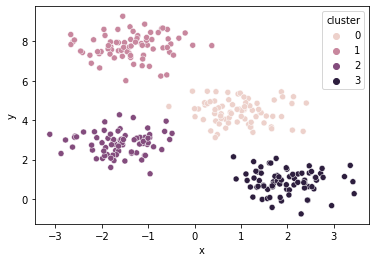

In [30]:
#aqui eu crio um dataframe com as coordenadas dos pontos ("x" e "y"), e com as labels dos clusters
clustered_data = pd.concat([pd.DataFrame(X), pd.Series(clusters)],axis=1)

#aqui eu renomeio as colunas do dataframe
clustered_data.columns = ['x','y','cluster']

#aqui eu faço o scatterplot
sns.scatterplot(clustered_data["x"], clustered_data["y"], hue = clustered_data["cluster"])

Bem legal, não é mesmo? :)

### 2.2 - Determinando o k

<img src="images/choose_k_value.jpeg"  style="width: 800px" /> <br>
Fonte: https://ml-explained.com/blog/kmeans-explained

Mas e se não for tão fácil de plotar os dados para determinar o k?

Pode ser que não consigamos visualizar nossos dados em 2D, se, por exemplo, tivermos mais de 3 features em nossos dados...

Neste caso, podemos usar o **método do cotovelo**, que consiste em rodar o k-means várias vezes, para diferentes valores de k, e depois plotar um gráfico da inércia.

A inércia, ou mais conhecida como **WCSS** (Within-Cluster-Sum-of-Squares) que significa "soma de quadrados intra-cluster", é calculada como a soma das distâncias (ao quadrado) entre os pontos e os centróides dos clusters.

Quanto menor o WCSS, mais eficiente foi a clusterização, **mas até certo ponto!**

Conforme o número de clusters (k) aumenta, o WCSS diminui, sendo mínimo quando cada ponto é seu próprio cluster isolado (o que não é nada útil, pois se cada ponto for um cluster, não há clusterização alguma!).

Assim, o que queremos não é encontrar um k que minimize o WCSS, mas sim um k **a partir do qual o WCSS para de decrescer tão rapidamente!**

Quando encontramos este k, encontramos o número ideal de clusters!

Ao plotarmos o WCSS (inércia) em função de k, o que buscaremos será então o valor de k onde o gráfico deixa de ser tão inclinado. Esses pontos são visualizados como "quinas", ou **cotovelos** no gráfico -- e daí vem o nome do método!

Para aplicar o método, fazemos:

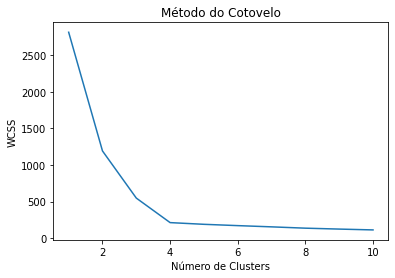

In [46]:
#inicializamos uma lista vazia para armazenar a inercia de cada modelo com um k diferente
#a inercia é a soma dos quadrados das distâncias dos pontos ao cluster mais próximo, e funciona como uma espécie de erro.
inercia = []

#criamos um iterável para os valores de k que vamos testar. Neste caso, testaremos de 1 a 10!
lista_k = range(1, 11)

#aqui vamos somente fitar o modelo para cada um dos k e atualizar nossa lista de inercias
for k in lista_k:
    #aqui fitamos o modelo
    kmeans = KMeans(n_clusters=k).fit(X)

    #aqui apendamos a inercia do modelo com o k atual à nossa lista
    #a inercia é a propriedade ".inertia_" do modelo!
    inercia.append(kmeans.inertia_)

# Aqui plotamos a inercia em função do k!
plt.plot(range(1, 11), inercia)
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
#a inercia também é chamada de WCSS
plt.ylabel('WCSS')
plt.show()

O valor de k mais adequado é aquele em que o gráfico tem uma "quina" bem abrupta: no exemplo acima, k = 4, como já sabíamos!

### 3 Quando uso algoritmos de clusterização, e em que casos eles não são uma boa ideia?
De certa forma, algoritmos de clusterização podem ser vistos como classificadores, uma vez que os clusters podem caracterizar um grupo, ou uma classe.

No entanto, há uma diferença bem importante entre problemas de classificação e clusterização:

* **Problemas de classificação** em geral são **supervisionados**, isto é, os dados que utilizamos têm tanto as features como os **targets**. Em outras palavras, neste tipo de problema, sabemos de antemão quais são as classes de interesse!

* **Problemas de clusterização**, por outro lado, são **não-supervisionados**. ou seja, os dados **não têm targets**, temos apenas as features! O nosso objetivo é justamente descobrir **alguma estrutura de agrupamento nos dados**, mas sem qualquer informação prévia quanto aos grupos a serem formados.

Foi exatamente o caso do nosso exemplo: nós tínhamos apenas as features dos dados (coordenadas x e y), e **nenhuma informação quanto aos grupos que seriam formados**.

Foi só depois que fizemos a análise exploratória dos dados (plot), que pudemos identificar alguma estrutura (4 clusters), para então aplicar o k-means!

Assim sendo, via de regra, a utilização ou não de algoritmos de clusterização, além do tipo de problema, depende dos dados disponíveis:

Se os dados são **previamente classificados (temos features e targets)**, a melhor estratégia é usar **algoritmos de classificação** (regressão logística, árvores, SVM, etc.);

Mas, se os dados **não são previamente classificados (temos apenas as features)**, a melhor estratégia é usar **algoritmos de clusterização** (k-means, DBSCAN, hierarchical clustering, etc.)

## 5. Modelos Supervisionados: Classificação e Regressão
### 1. Introdução

<img src="images/regxclass.png"  style="width: 400px" /> <br>

Fonte: https://medium.com/machina-sapiens/algoritmos-de-aprendizagem-de-m%C3%A1quina-qual-deles-escolher-67040ad68737



| Classificação | Regressão |
| :-: | :-: |
| Predição são labels de classe discreta | Predição é uma quantidade contínua |
| Podemos ter classificação binária ou multiclasse | Regressão múltipla: várias variáveis de input |
| Busca-se uma fronteira de decisão | Busca-se curva com o melhor fit |
|Métricas de erro: Acurácia, Precisão, Revocação, F1 | Métricas de erro: MAE, MSE, $R^2$ |
|Ex: predizer se um aluno vai passar de ano ou não | Ex: Predizer a a nota de um aluno |

Problemas de Classificação: deseja-se determinar a que **categoria** (ou **classe**) dentro de um conjunto de categorias uma dada observação pertence, com base em suas features. Nesse tipo de problema, o **target é uma classe**.

Exemplos de problemas de classificação:

* Detecção de e-mails SPAM: um e-mail é SPAM ou não?;
    * Features: palavras contidas no corpo do e-mail; remetente; assunto;
* Detecção de doenças: que codição médica a pessoa tem?
    * Features: sintomas fisiológicos; resultados de exames (medidas de variáveis biológicas);
* Detecção do tipo de documento: secreto, confidencial ou não-sensível?
    * Features: palavras no corpo do texto; título;
* Detecção de fraudes de cartão de crédito: uma operação é fraudulenta ou não?;
    * Features: histórico de transações; hora, local e frequência das transações; tipo de compra;
* Modelo de risco de crédito: qual é a chance de determinada pessoa não pagar seu empréstimo?
    * Features: histórico de pagamento; score de crédito; <br>
    
Para resolver problemas de classificação, construímos um classificador: modelo que tem como input as features (contínuas ou discretas) e como output uma entre as classes (discretas).


## Classificação: KNN e métricas de avaliação
#### 1. KNN
KNN vem do inglês **K nearest neighbours**, isto é, **K vizinhos mais próximos**.

#### 1.1 Introdução Intuitiva
Um modelo bastante conhecido e intuitivo é o algoritmo do Vizinho Mais Próximo, que é um modelo baseado na proximidade entre os elementos.

A hipótese que baseia esse tipo de modelo é que:

* **Observações similares** tendem a estar concentradas em uma mesma região, isto é, **próximos entre si**;

* De forma análoga, **dados não similares** estão **mais distantes entre si**.

Podemos observar esse efeito acontecendo claramente no conjunto de dados Iris: <br>
<img src="images/ML5.png" style="width: 600px" />

## 1.2. O Vizinho Mais Próximo
O algoritmo do vizinho mais próximos **classifica um novo objeto** com base nos exemplos do conjunto de treinamento que **são mais próximos a ele**.

Cada objeto representa um ponto no espaço, o qual é definido pelo conjunto de features disponíveis para o modelo.

Podemos calcular a distância entre dois pontos usando a fórmula da **distância Euclidiana**, definida como

<br>
$ d(x_i,x_j)=\sqrt{∑(x_i−x_j)^2} $
<br>
    
onde xi e xj são dois pontos num espaço com d features; $x_i$ e $x_j$ são os valores dos l-ésimo atributo de xi e xj, respectivamente.

Dessa forma, num modelo de classificação, a classe predita para uma nova instância será aquela do vizinho mais próximo a essa nova instâcia.

<img src="images/ML6.png" style="width: 300px" />

Nesse modelo, a fase de treinamento consiste apenas na leitura dos dados de treino, sendo por esse motivo conhecido como um algoritmo preguiçoso: todos os cálculos necessários são realizados apenas no momento de predição.

### 1.3. Os k Vizinhos Mais Próximos
Podemos estender o algoritmo do Vizinho Mais Próximo ao utilizar uma vizinhança maior, ou seja, os k vizinhos mais próximos, ao invés de considerarmos um único vizinho.

Para a classe da observação avaliada, é **escolhida a classe predominante (moda) dos k vizinhos mais próximos da observação**.

<img src="images/algoritmo_passo_a_passo.png"  style="width: 700px" />

Porém, quando a variável resposta for contínua, não faz sentido calcular a moda. Nesses casos, utilizamos estatísticas próprias para variáveis contínuas, como **média e mediana**.

É importante salientar também que o **KNN é altamente sensível a escalas**. Variáveis com magnitudes muito maiores que outras vão ter grande influência no resultado da previsão.

Desta forma, um **pré-processamento** importante a ser feito é a **normalização ou padronização das features**.

### 1.4. Exemplo Prático

In [73]:
# Importar lib
from sklearn.neighbors import KNeighborsClassifier

# Abrir conjunto de dados
dataset = pd.read_csv('titanic.csv')

# Definir variável target
target = 'Survived'

# Eliminar variáveis categóricas + PassengerId
dataset.drop(['Name','Sex','Ticket','Cabin','Embarked','PassengerId'], axis=1, inplace=True)

#Eliminar nulos
dataset.dropna(inplace=True)

# Separar as variáveis independentes do target
X = dataset.drop([target], axis=1)       # Variáveis independentes
y = dataset[[target]]                    # Variável dependente / target  

Quando treinamos um modelo é necessário testá-lo em um conjunto de teste. Isso ajuda a validar o quanto seu modelo consegue generalizar e a ajustar melhor o modelo.

<img src="images/splitting-data-set.png"  style="width: 500px" />

In [74]:
# Separa um dataset para treino e outro para teste (80/20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

print("Tamanho do treino: ", X_train.shape)
print("Tamanho do teste: ", X_test.shape)

Tamanho do treino:  (571, 5)
Tamanho do teste:  (143, 5)


In [1]:
# Instancia o modelo considerando 3 vizinhos mais próximos e distância euclidiana p=2
k=3 # quantidade de vizinhos 

clf = KNeighborsClassifier(n_neighbors=k, 
                           p=2) # use p=2 para distância euclidiana
# dá um fit no modelo
clf.fit(X_train, y_train)

# Predizendo no dataset de teste
y_pred = clf.predict(X_test)
y_pred[:5]

## 2. Métricas de avaliação
Como podemos mensurar a qualidade do modelo? Ou, se treinarmos vários modelos diferentes, como determinar qual é o melhor?

Para responder a estas perguntas, utilizamos as **métricas de avaliação** de modelos de classificação.

Existem diversas formas de realizar tais avaliações, cada uma observando o problema de um ponto de vista diferente.

### 2.1 Acurácia
Também conhecida como **taxa de acerto**, essa medida de desempenho traz a proporção de acertos sobre o total de observações:

$$
\frac{VP + VN}{VP + VN + FP + FN}
$$ 

na qual:
<br>
* VP representa a quantidade de Verdadeiro Positivo: classes 1 que foram previstas como 1
* VN representa a quantidade de Verdadeiro Negativo: classes 0 que foram previstas como 0
* FP representa a quantidade de Falso Positivo: classes 0 que foram previstas como 1
* FN representa a quantidade de Falso Negativo: classes 1 que foram previstas como 0

A taxa de acerto é um número *limitado entre 0 e 1*. Quanto *maior for o seu valor, mais acurado é o modelo M*.


### 2.2 Matriz de Confusão
Uma alternativa para visualizar o desempenho de um modelo é analisar sua matriz de confusão, que ilustra o número de predições corretas e incorretas para cada classe do modelo.

* As linhas dessa matriz representam as classes verdadeiras;

* As colunas representam as classes preditas pelo modelo.

Logo, cada elemento $ m_{ij} $ de uma matriz de confusão M apresenta o número de exemplos da classe **i** classificados como classe **j**.

Dessa forma, os elementos na **diagonal principal** indicam as classificações feitas de forma **correta**, enquanto os **outros elementos** são os classificados de forma **incorreta**.

<img src="images/ML8.png" style="width: 300px" />

Por meio dela, temos as medidas quantitativas de quais classes possuem maior dificuldade de serem corretamente classificadas, se existe alguma "confusão" recorrente entre duas classes e mais uma série de medidas quantitativas sobre o modelo, como veremos a seguir.


Acurácia do modelo: 68.5%


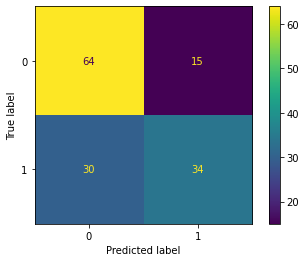

In [85]:
# Importar accuracy_score e plot_confusion_matrix do sklearn.metrics 
from sklearn.metrics import accuracy_score, plot_confusion_matrix

# Calcular a acurácia utilizando o accuracy_score
ac = accuracy_score(y_test, y_pred)

print(f"Acurácia do modelo: {ac:.1%}")

plot_confusion_matrix(clf, X_test, y_test);

Pronto! Agora você tem um modelo de KNN para usar de baseline

### Bibliografia
https://www.slideshare.net/jorisschelfaut/knn-154482179 <br>
https://www.kaggle.com/rakeshrau/social-network-ads <br>
https://realpython.com/knn-python/ <br>
https://cambridgecoding.wordpress.com/
https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote02_kNN.html